# Some More Geometric Manipulations with Shapely

Let's go through a little more manipulation using Shapely and GeoSeries.

Can deal either with the GeoSeries, or directly use GeoPandas objects

We will encounter:

- Bounds/Hulls
- Buffering
- Transformations

In [46]:
#First get our basic libraries:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

## Get US State/County Geometries in CONUS

In [47]:
#Get shapefile data directly from census URLs
#########

#Load state & county geometries:
#URLs:
url_state = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip'

#And grab:
state_gdf = gpd.read_file(url_state)
county_gdf = gpd.read_file(url_county)

#Also, exclude anything outside the CONUS:
exclude_list = [15, 72, 2, 60, 66, 69, 78]

#~ is not
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(exclude_list)]
county_gdf = county_gdf.loc[~county_gdf['STATEFP'].astype(int).isin(exclude_list)]

<AxesSubplot: >

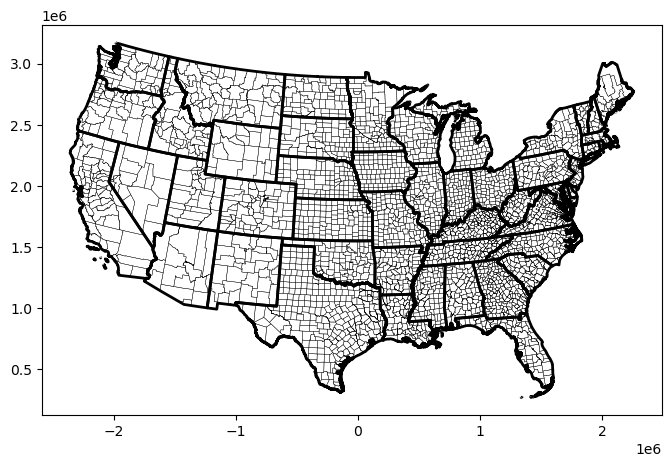

In [48]:
## And convert to North American Albers: EPSG 5070
state_gdf = state_gdf.to_crs(5070)
county_gdf = county_gdf.to_crs(5070)

## Quick set of plots to check result:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

state_gdf.plot(ax=ax1, facecolor='none', linewidth=2)
county_gdf.plot(ax=ax1, facecolor='none', linewidth=.25)

### Bounding Boxes

- We can get total bounds of a GeoDataFrame with: `GeoSeries.total_bounds`:

In [49]:
#Note gives us a numpy array:

state_gdf.total_bounds

array([-2356113.74289801,   269573.55856245,  2258200.17691555,
        3172567.92060716])

(269573.5585624533, 3172567.920607156)

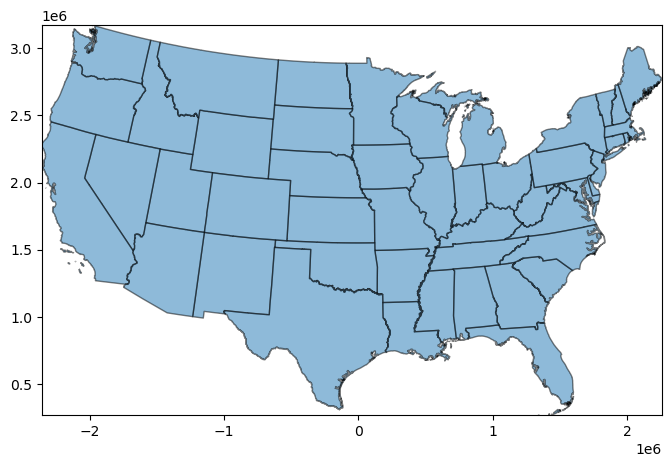

In [50]:
#We could set the x and y limits based on this:
######

fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

state_gdf.plot(edgecolor='black', alpha=.5, ax=ax1)


b = state_gdf.total_bounds

ax1.set_xlim(b[0], b[2])
ax1.set_ylim(b[1], b[3])

### `GeoSeries.bounds` & `GeoSeries.envelope`

- `GeoSeries.bounds` gives DataFrame with `minx`, `miny`, `maxx`, and `maxy` values for every observation:

In [51]:
#We get a DataFrame with no explicit geometry
####

#Note: state_gdf.geometry.bounds is equivalent to below:
b = state_gdf.bounds

b

,minx,miny,maxx,maxy
0,-1.250355e+06,2.027604e+06,-6.337656e+05,2.539525e+06
2,1.396621e+06,1.837626e+06,1.797029e+06,2.037741e+06
4,1.226563e+05,1.107309e+06,5.683809e+05,1.510471e+06
5,-6.238828e+05,2.549801e+06,-4.296053e+04,2.913445e+06
6,1.704048e+06,1.901208e+06,1.796564e+06,2.055136e+06
8,-1.233579e+06,9.918128e+05,-6.167586e+05,1.629466e+06
9,-1.581791e+06,1.629466e+06,-1.085521e+06,2.250700e+06
10,1.155240e+06,1.668037e+06,1.551960e+06,2.064061e+06
11,-5.323649e+05,1.550628e+06,1.218386e+05,1.903622e+06
12,9.392231e+05,9.055904e+05,1.419556e+06,1.405946e+06


<AxesSubplot: >

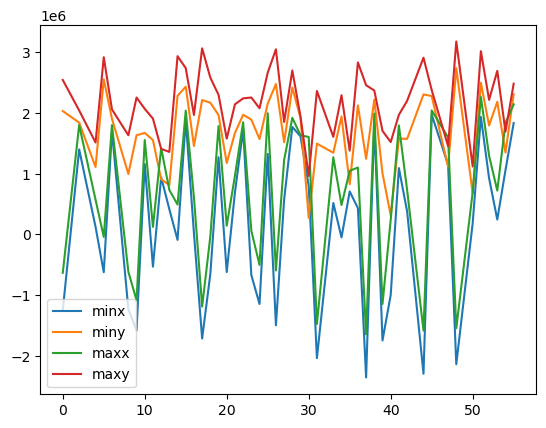

In [52]:
#If we plot?
b.plot()

#### `GeoSeries.envelope`

- Gives us a GeoSeries consisting of Shapely geometries:

In [54]:
#Note that state_gdf.envelope is equivalent:
state_gdf.geometry.envelope

0     POLYGON ((-1250354.798 2027603.667, -633765.57...
2     POLYGON ((1396620.832 1837625.563, 1797029.072...
4     POLYGON ((122656.347 1107309.209, 568380.887 1...
5     POLYGON ((-623882.830 2549801.397, -42960.534 ...
6     POLYGON ((1704048.270 1901208.341, 1796563.904...
8     POLYGON ((-1233579.222 991812.771, -616758.562...
9     POLYGON ((-1581791.428 1629466.067, -1085520.6...
10    POLYGON ((1155240.109 1668037.400, 1551959.847...
11    POLYGON ((-532364.919 1550628.433, 121838.567 ...
12    POLYGON ((939223.082 905590.422, 1419555.618 9...
13    POLYGON ((412278.687 810292.655, 729491.300 81...
14    POLYGON ((-91851.401 2278542.625, 489292.177 2...
15    POLYGON ((1879917.519 2428352.100, 2035113.945...
16    POLYGON ((18912.788 1453107.803, 608217.985 14...
17    POLYGON ((-1715671.063 2208889.889, -1189292.1...
18    POLYGON ((-652232.603 2164648.238, -35340.832 ...
19    POLYGON ((1268319.687 1962636.223, 1781847.874...
20    POLYGON ((-620900.677 1173104.747, 141320.

<AxesSubplot: >

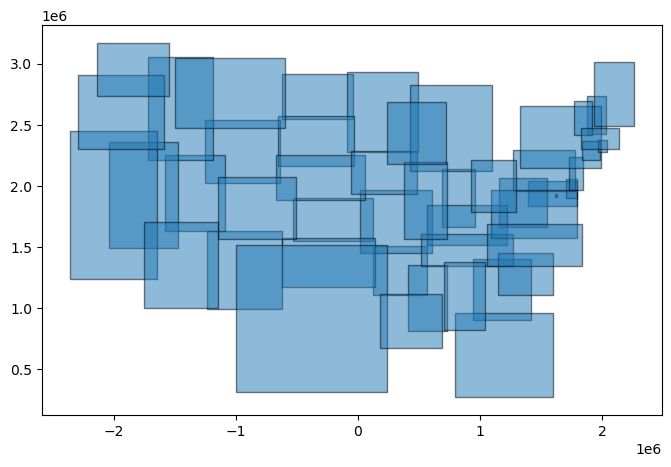

In [55]:
#Plotting givs:

fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

state_gdf.envelope.plot(edgecolor='black', alpha=.5, ax=ax1)

39    POLYGON ((-1746908.154 1002286.862, -1146479.8...
dtype: geometry

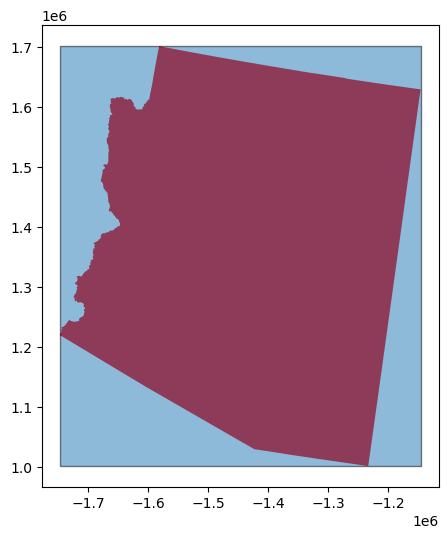

In [56]:
#And let's plot the envelope for AZ along with AZ:
env = state_gdf.loc[state_gdf['STATEFP'] == '04'].geometry.envelope


fig, ax1 = plt.subplots(1,1, figsize=(6, 6))

state_gdf.loc[state_gdf['STATEFP'] == '04'].plot(ax=ax1, facecolor='red')
env.plot(edgecolor='black', alpha=.5, ax=ax1)

#And again note that env is a GeoSeries:
env

### Buffering:

#### `GeoSeries.buffer(distance, resolution=16)`

- Note units for `distance`

- See https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.buffer.html for some other examples

<AxesSubplot: >

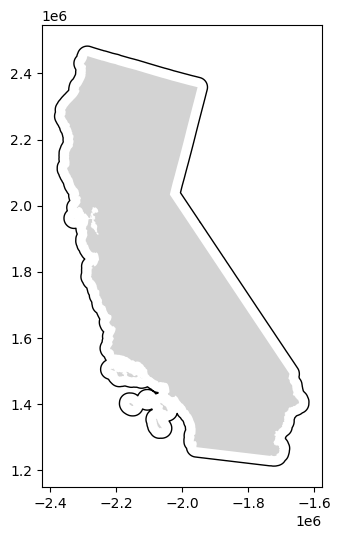

In [62]:
#Example:
###############

fig, ax1 = plt.subplots(1,1, figsize=(6, 6))

#California
state_gdf.loc[state_gdf.STATEFP == '06'].plot(ax = ax1, facecolor='lightgrey', linewidth=2)

#California + Buffer
state_gdf.loc[state_gdf.STATEFP == '06'].buffer(3e4).plot(ax = ax1, facecolor='none', edgecolor='black', linewidth=1)

<AxesSubplot: >

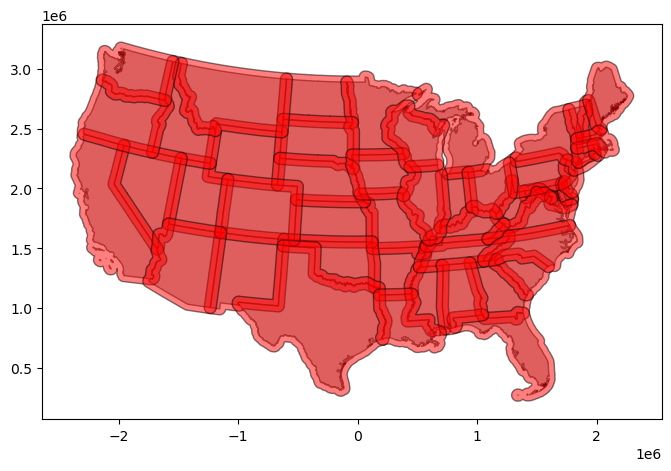

In [45]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

state_gdf.plot(edgecolor='black', facecolor='grey', alpha=.5, ax=ax1)
state_gdf.buffer(5e4).plot(edgecolor='black', facecolor='red', alpha=.5, ax=ax1)


### `GeoSeries.boundary`

- Get the boundary for a GeoSeries

- Consider the seven Colorado River Basin states:

    - Arizona, California, Colorado, Nevada, New Mexico, Utah, Wyoming
        

<AxesSubplot: >

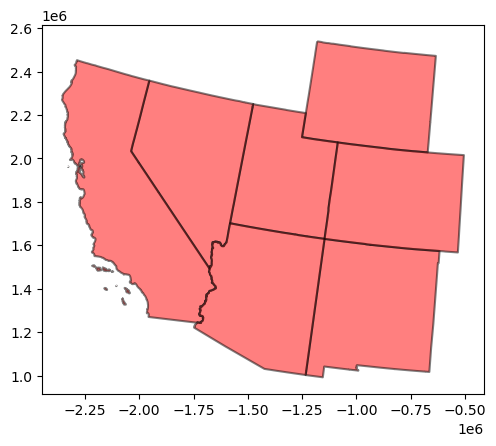

In [63]:
#STATEFP Codes:
#4 = AZ, 6 = CA, 8 = CO, 32 = NV, 35 = NM, 49 = UT, 56 = WY
state_list = ['04', '06', '08', '32', '35', '49', '56']

state_gdf.loc[state_gdf.STATEFP.isin(state_list)].boundary.plot(edgecolor='black', facecolor='red', alpha=.5)

### `GeoSeries.convex_hull`

<AxesSubplot: >

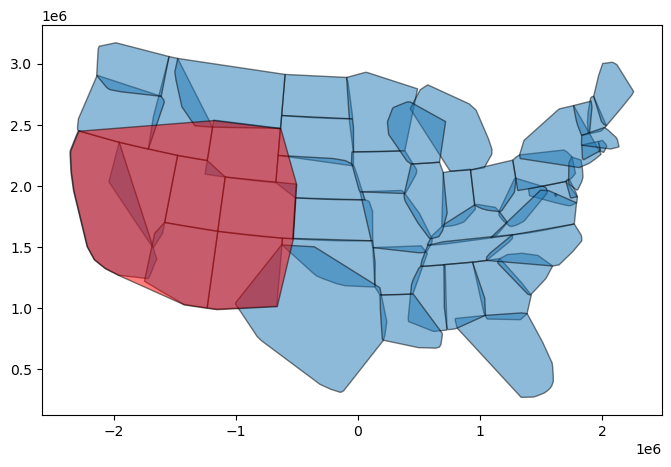

In [64]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

#State convex hulls:
state_gdf.convex_hull.plot(edgecolor='black', alpha=.5, ax=ax1)

#Dissolve the basin states and add the convex hull
state_gdf.loc[state_gdf.STATEFP.isin(state_list)].dissolve().convex_hull.plot(edgecolor='black', facecolor='red', alpha=.5, ax=ax1)

### `GeoSeries.simplify(tolerance, preserve_topology=True)`

<AxesSubplot: >

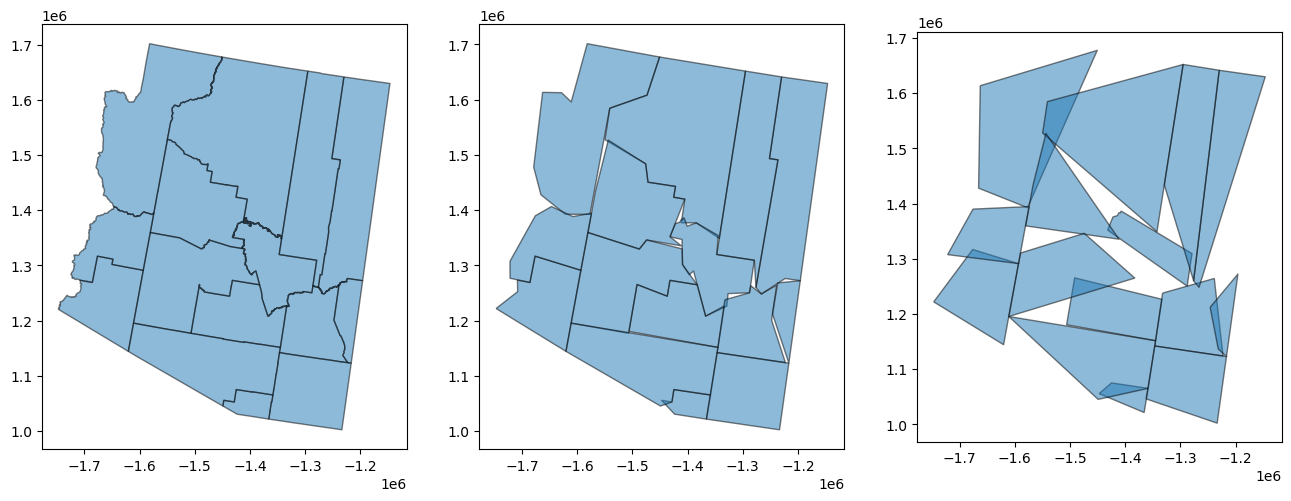

In [67]:
#Let's simplify AZ:
######

fig, ax1 = plt.subplots(1,3, figsize=(16, 8))

plot_gdf = county_gdf.loc[county_gdf.STATEFP == '04']

#AZ:
plot_gdf.geometry.plot(edgecolor='black',  alpha=.5, ax=ax1[0])


#Simplify a little
plot_gdf.geometry.simplify(tolerance=1e4).plot(edgecolor='black', alpha=.5, ax=ax1[1])

#And a little more:
plot_gdf.geometry.simplify(tolerance=1e5).plot(edgecolor='black', alpha=.5, ax=ax1[2])


### `GeoSeries.unary_union`

- Union several shapes to a single Shapely polygon

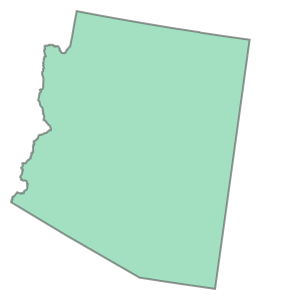

In [68]:
#Note this gives us a Shapely polygon:

az = plot_gdf['geometry'].unary_union
az

In [69]:
type(az)

shapely.geometry.polygon.Polygon

<AxesSubplot: >

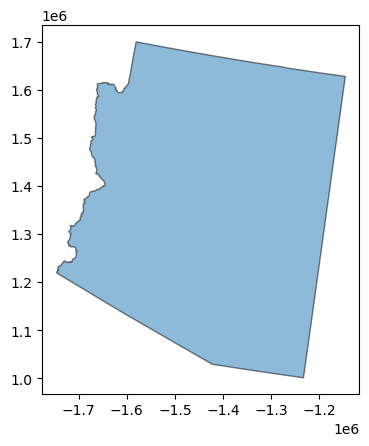

In [72]:
#To plot in a matplotlib axis, the easiest option is to convert to a GeoSeries:
#Note we should set the CRS as well, will be None by default
az = gpd.GeoSeries(az, crs=5070)

az.plot(edgecolor='black', alpha=.5)

#Could examine our CRS if we like:
#az.crs

## Transformations

### `GeoSeries.affine_transform(self, matrix)`

- See https://shapely.readthedocs.io/en/stable/manual.html#shapely.affinity.affine_transform

For 2-D transformation, matrix is `[a, b, d, e, x_{off}, y_{off}]`, and represents transformation:

$$
\begin{pmatrix}
    x' \\
    y' \\
    1
\end{pmatrix}
=
\begin{pmatrix}
    a & b & x_{off} \\
    d & e & y_{off} \\
    0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
    x \\
    y \\
    1
\end{pmatrix},
$$

yielding

$$
x' = ax + by + x_{off}
$$
$$
y' = dx + ey + y_{off}
$$

One particular transformation is rotation, given by

$$
\begin{pmatrix}
    \cos{\theta} & -\sin{\theta} & 0 \\
    \sin{\theta} & \cos{\theta} & 0 \\
    0 & 0 & 1
\end{pmatrix}
$$

as follows:

<AxesSubplot: >

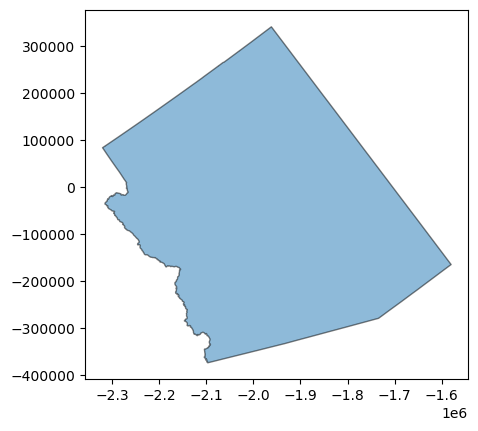

In [75]:
#Rotate our az GeoSeries using affine_transformation:
#45 degrees clockwise in rad:
#Positive for counter-clockwise, negative for clockwise
angle = np.pi/4

az_rotated = az.affine_transform([np.cos(angle), -np.sin(angle), np.sin(angle), np.cos(angle), 0, 0])

az_rotated.plot(edgecolor='black', alpha=.5)

### Also have dedicated transformations:

- Let's look at some examples on the AZ geometry

- First grab a representation of the US as a whole for background:

<AxesSubplot: >

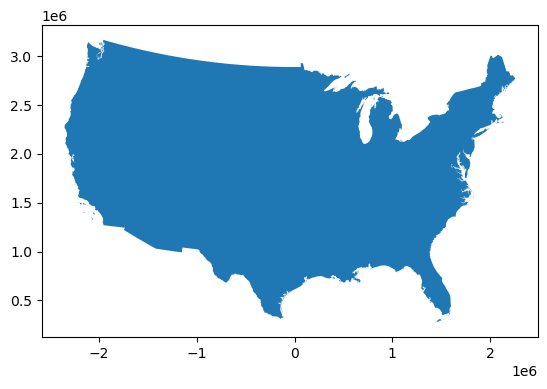

In [76]:
#Dissolve all states:
nation_gdf = state_gdf.dissolve()
nation_gdf.plot()

### Rotate

#### `GeoSeries.rotate(angle, origin='center', use_radians=False)`


<AxesSubplot: >

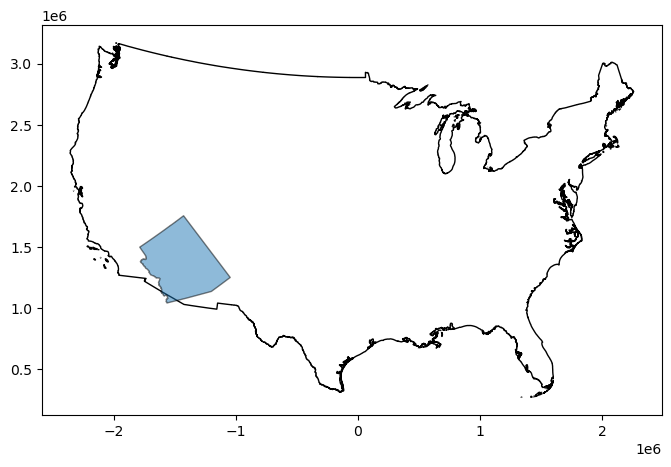

In [77]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

#45 degree rotation
az_rotated = az.rotate(45)

#And plot
nation_gdf.plot(facecolor='none', ax=ax1)
az_rotated.plot(edgecolor='black', alpha=.5, ax=ax1)

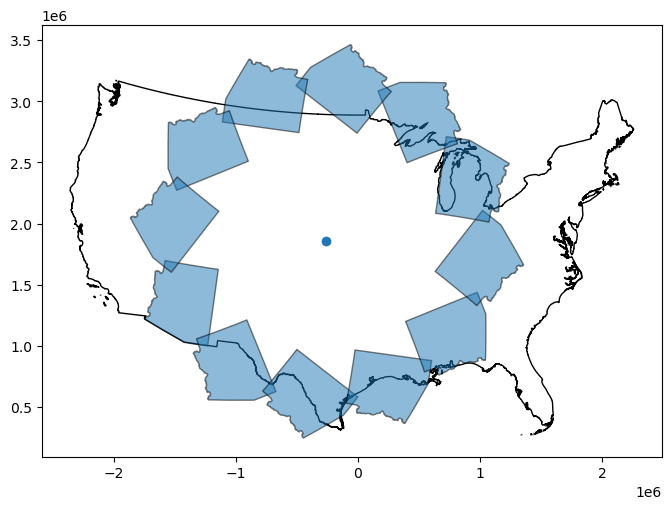

In [85]:
#Or, rotate about the centroid of our nation_gdf:
##########

fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

nation_gdf.plot(facecolor='none', ax=ax1)

#Plot the centroid, about which we rotate
nation_gdf.centroid.plot(ax=ax1)

#Do multiple rotations:
for r in range(0, 360, 30):
    az_rotated = az.rotate(r, origin=nation_gdf.centroid.geometry.iloc[0])
    
    az_rotated.plot(edgecolor='black', alpha=.5, ax=ax1)

### Scale

#### `GeoSeries.scale(xfact=1.0, yfact=1.0, zfact=1.0, origin='center')`

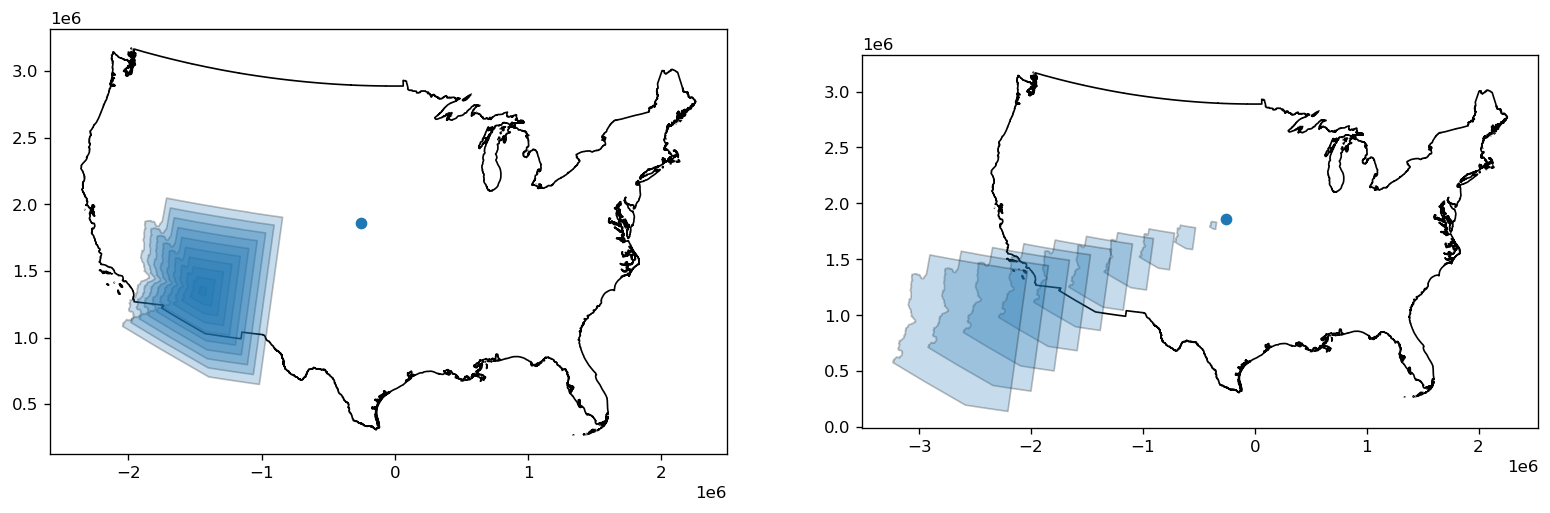

In [86]:
#Scale about center origin or the centroid of the US:
##########

fig, ax1 = plt.subplots(1,2, figsize=(16, 8), dpi=120)

#Make background maps:
for k in range(2):
    nation_gdf.plot(facecolor='none', ax=ax1[k])
    nation_gdf.centroid.plot(ax=ax1[k])

#Scale about the center of AZ or the US
for r in np.linspace(.1, 2, 10):
    
    #Scale about the center of AZ:
    az_scaled = az.scale(xfact=r, yfact=r)
    az_scaled.plot(edgecolor='black', alpha=.25, ax=ax1[0])
    
    #Centroid of US:
    az_scaled = az.scale(xfact=r, yfact=r, origin=nation_gdf.centroid.geometry.iloc[0])
    az_scaled.plot(edgecolor='black', alpha=.25, ax=ax1[1])

### Skew

#### `GeoSeries.skew(xs=0.0, ys=0.0, origin='center', use_radians=False)`

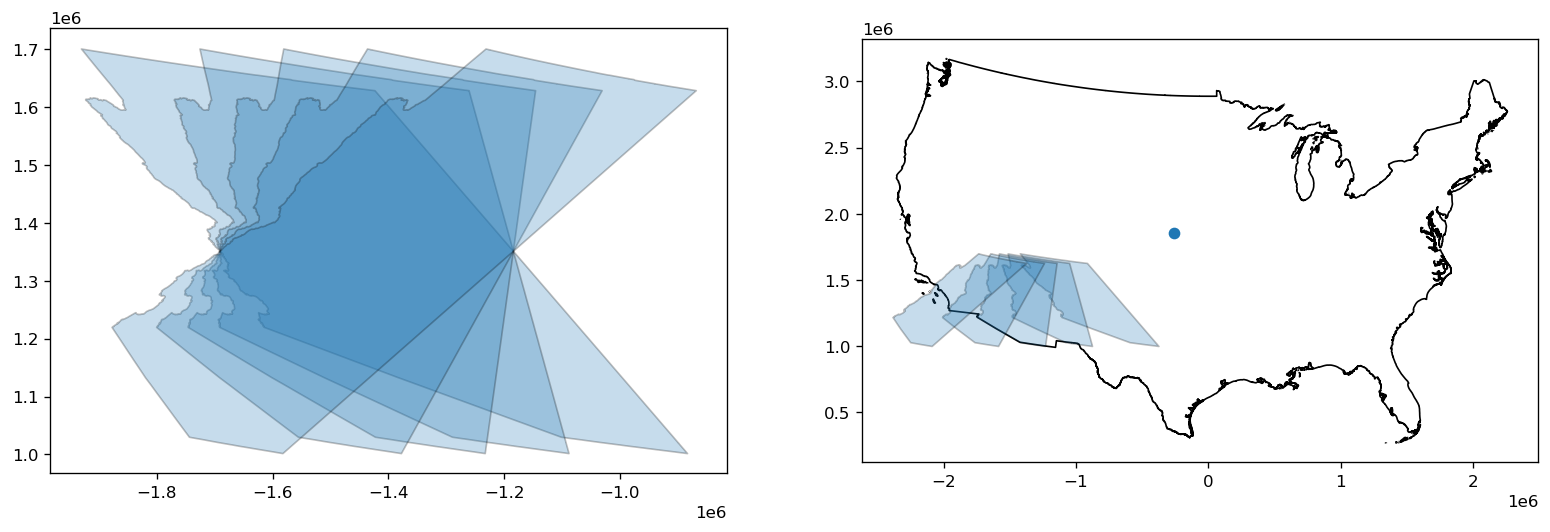

In [87]:
#And skew...
##########

fig, ax1 = plt.subplots(1,2, figsize=(16, 8), dpi=120)

nation_gdf.plot(facecolor='none', ax=ax1[1])
nation_gdf.centroid.plot(ax=ax1[1])

for r in np.linspace(-45, 45, 5):
    
    #Center:
    az_skew = az.skew(xs=r, ys=0.0)
    az_skew.plot(edgecolor='black', alpha=.25, ax=ax1[0])
    
    #Centroid of US:
    az_skew = az.skew(xs=r, ys=0.0, origin=nation_gdf.centroid.geometry.iloc[0])
    az_skew.plot(edgecolor='black', alpha=.25, ax=ax1[1])

### Translate

#### `GeoSeries.translate(xoff=0.0, yoff=0.0, zoff=0.0)`

<AxesSubplot: >

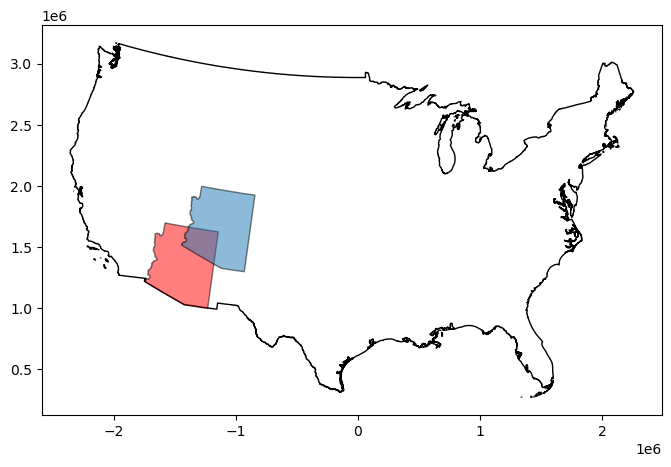

In [88]:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8))

#Make the translated GeoSeries:
az_translate = az.translate(xoff = 3e5, yoff=3e5)

#Background nation:
nation_gdf.plot(facecolor='none', ax=ax1)

#Plot AZ and translated version:
az.plot(edgecolor='black', facecolor='red', alpha=.5, ax=ax1)
az_translate.plot(edgecolor='black', alpha=.5, ax=ax1)

### See Shapely User Manual for More...

- https://shapely.readthedocs.io/en/stable/manual.html